In [24]:
import numpy as np
import pandas as pd

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_json('/home/madhu/Downloads/json/dataset_new.json')

In [34]:
df.head()

,id,latitude,longitude,infection,year,month,day,hour,minute,second
0,MOLLY,13.0360,77.753197,0,2020,6,22,21,58,15
1,OSCAR,13.0572,77.629997,0,2020,6,21,11,49,23
2,MILO,12.9336,77.453598,0,2020,6,21,12,49,23
3,COCO,12.9567,77.631599,0,2020,6,21,10,49,23
4,COCO,13.0389,77.745102,0,2020,6,21,12,49,23


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         500 non-null    object 
 1   latitude   500 non-null    float64
 2   longitude  500 non-null    float64
 3   infection  500 non-null    int64  
 4   year       500 non-null    int64  
 5   month      500 non-null    int64  
 6   day        500 non-null    int64  
 7   hour       500 non-null    int64  
 8   minute     500 non-null    int64  
 9   second     500 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 39.2+ KB


In [29]:
from datetime import datetime as dt
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

In [32]:
df.drop('timestamp', axis = 1, inplace=True)

In [33]:
df.corr()

,latitude,longitude,infection,year,month,day,hour,minute,second
latitude,1.000000,-0.030669,0.051000,NaN,NaN,-0.017810,-0.021704,-0.047124,-0.005946
longitude,-0.030669,1.000000,0.046833,NaN,NaN,0.105649,0.109255,0.034531,-0.101204
infection,0.051000,0.046833,1.000000,NaN,NaN,0.002069,0.012918,-0.422619,-0.014380
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,-0.017810,0.105649,0.002069,NaN,NaN,1.000000,0.987368,0.306287,-0.944701
hour,-0.021704,0.109255,0.012918,NaN,NaN,0.987368,1.000000,0.269333,-0.911173
minute,-0.047124,0.034531,-0.422619,NaN,NaN,0.306287,0.269333,1.000000,-0.283388
second,-0.005946,-0.101204,-0.014380,NaN,NaN,-0.944701,-0.911173,-0.283388,1.000000


In [36]:
df.describe()

,latitude,longitude,infection,year,month,day,hour,minute,second
count,500.000000,500.000000,500.000000,500.0,500.0,500.000000,500.000000,500.000000,500.000000
mean,12.978246,77.628240,0.068000,2020.0,6.0,21.408000,14.952000,51.890000,18.428000
std,0.054771,0.100578,0.251998,0.0,0.0,0.491955,4.698281,8.717217,5.835488
min,12.879800,77.445099,0.000000,2020.0,6.0,21.000000,10.000000,8.000000,9.000000
25%,12.932800,77.542477,0.000000,2020.0,6.0,21.000000,11.000000,49.000000,15.000000
50%,12.978800,77.636200,0.000000,2020.0,6.0,21.000000,12.000000,49.000000,23.000000
75%,13.027625,77.709726,0.000000,2020.0,6.0,22.000000,20.000000,58.000000,23.000000
max,13.069300,77.797897,1.000000,2020.0,6.0,22.000000,22.000000,59.000000,23.000000


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

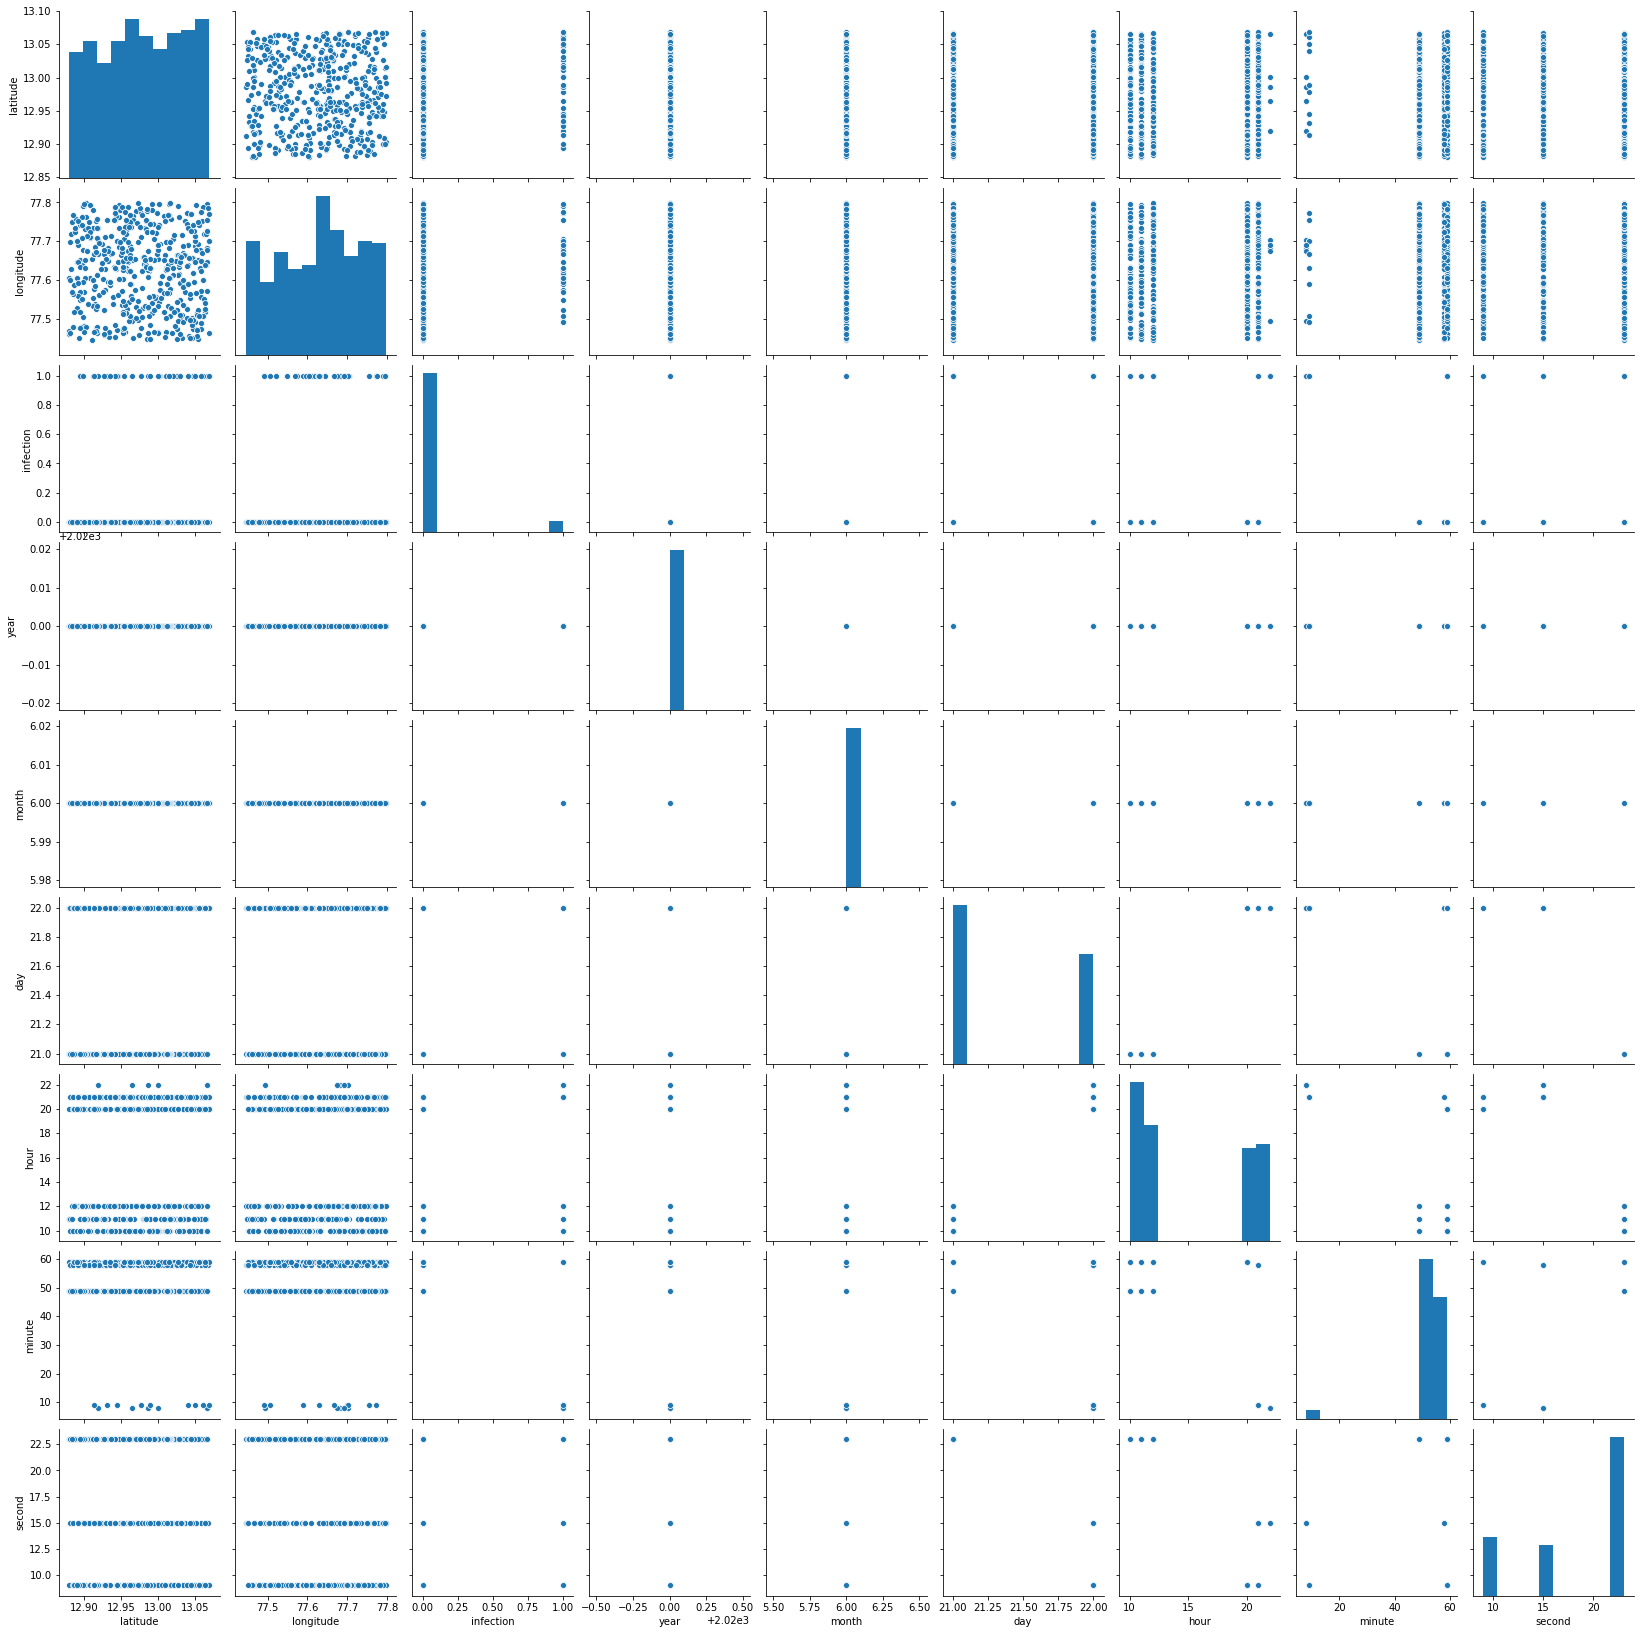

In [38]:
sns.pairplot(df)

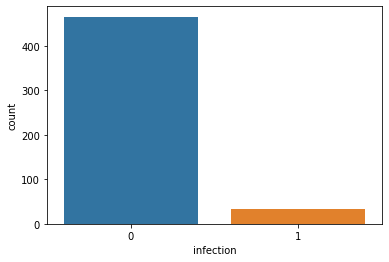

In [41]:
sns.countplot(x = 'infection', data = df)

Text(0.5, 0, 'ID')

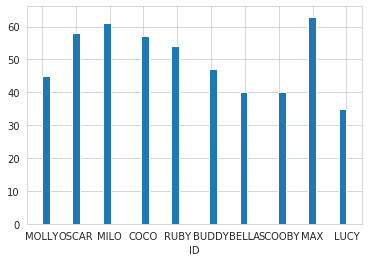

In [47]:
sns.set_style('whitegrid')
df['id'].hist(bins = 40)
plt.xlabel('ID')

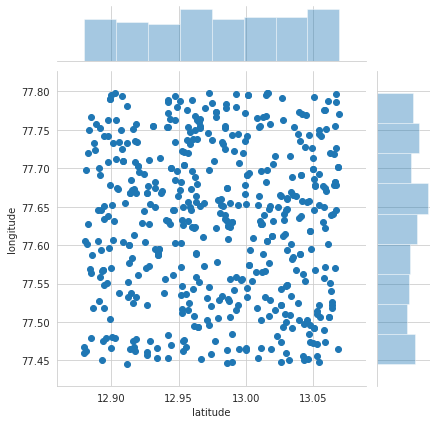

In [48]:
sns.jointplot('latitude', 'longitude', df)

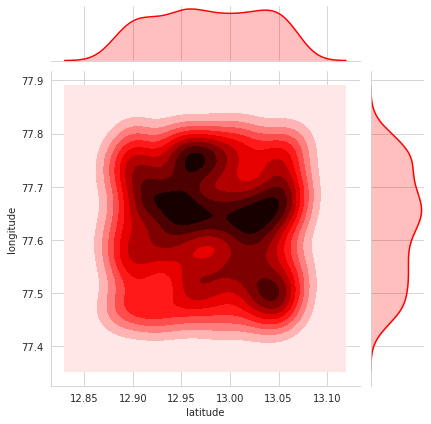

In [58]:
sns.jointplot('latitude','longitude', df, kind= 'kde', color = 'red')

In [51]:
df.isnull().sum()

id           0
latitude     0
longitude    0
infection    0
year         0
month        0
day          0
hour         0
minute       0
second       0
dtype: int64

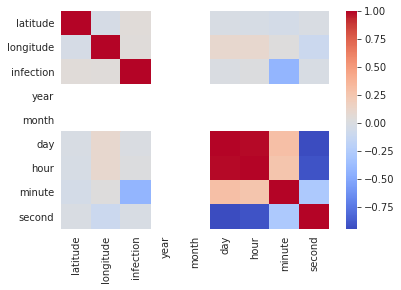

In [57]:
# sns.heatmap(df.drop('id', axis = 1), cmap='viridis')
sns.heatmap(df.corr(), cmap='coolwarm')

In [70]:
df.drop('id', axis = 1, inplace=True)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = df.drop('infection', axis = 1)
y = df['infection']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
pred = lr.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
print('classification report: ',classification_report(y_test, pred))

classification report:                precision    recall  f1-score   support

           0       0.94      1.00      0.97       135
           1       1.00      0.40      0.57        15

    accuracy                           0.94       150
   macro avg       0.97      0.70      0.77       150
weighted avg       0.94      0.94      0.93       150



In [80]:
print('confusion matrix: ',confusion_matrix(y_test, pred))

confusion matrix:  [[135   0]
 [  9   6]]


In [83]:
# sns.heatmap(df['infection']==1)

In [91]:
# df.sort_values(df['minute','year','month','day','hour','minute','second'])